### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. O Brasil nas Olimpíadas

Vamos começar estudando o desempenho do nossos próprio país. Gere um DataFrame novo contendo apenas as informações sobre atletas brasileiros.

#### 1.1 Importação, análise e modelagem dos dados

In [2]:
# Importando banco de dados 'csv'
df_dados_olimpicos = pd.read_csv('athlete_events.csv')
# Importando 'csv' com siglas
noc_regions = pd.read_csv('noc_regions.csv')

In [3]:
# VISUALIÇÃO 'df_dados_olimpicos'
df_dados_olimpicos.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [4]:
# VISUALIZAÇÃO 'noc_regions'
noc_regions.head(1)

,NOC,region,notes
0,AFG,Afghanistan,NaN


In [5]:
# VISUALIZANDO NÚMERO DE COLUNAS E LINHAS USANDO O COMANDO "shape": [0]linhas [1]colunas
print('Linhas no dataframe: df_dados_olimpicos',df_dados_olimpicos.shape[0])
print('Colunas no dataframe: df_dados_olimpicos',df_dados_olimpicos.shape[1])
print('Linhas no dataframe: noc_regions',noc_regions.shape[0])
print('Colunas no dataframe: noc_regions',noc_regions.shape[1])

Linhas no dataframe: df_dados_olimpicos 271116
Colunas no dataframe: df_dados_olimpicos 15
Linhas no dataframe: noc_regions 230
Colunas no dataframe: noc_regions 3


In [6]:
# RETIRAR COLUNA 'ID' USANDO O "drop" com "inplace=True" --> df_dados_olimpicos
df_dados_olimpicos.drop(columns=['ID'],inplace=True)

In [7]:
# RETIRAR COLUNA 'notes' USANDO O "drop" com "inplace=True" --> noc_regions
noc_regions.drop(columns=['notes'],inplace=True)

In [8]:
# FAZENDO MERGING COM O CSV COM 'NOC' COM O OBJETIVO DE FILTRAR E EXPOR MELHOR OS DADOS POR PAÍSES
df_dados_olimpicos = df_dados_olimpicos.merge(noc_regions,on='NOC',how='left')

In [9]:
# CHECANDO O MERGIN
df_dados_olimpicos.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
 14  region  270746 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 33.1+ MB


In [10]:
# CHECANDO VALORES NULOS COM 'isna' E TOTALIZANDO COM "sum()"
print(df_dados_olimpicos.isna().sum())
#CHECANDO VALORES DUPLICADOS COM 'duplicated' e TOTALIZANDO COM "sum()"
print(df_dados_olimpicos.duplicated().sum())

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
dtype: int64
1385


In [11]:
# REMOVENDO DUPLICADOS
df_dados_olimpicos.drop_duplicates(inplace=True)

In [12]:
# VERIFICANDO DADOS COLUNA 'MEDAL'
df_dados_olimpicos['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [13]:
# CONTAGEM COLUNA 'MEDALS' (O 'value_counts' ignora os NaN)
df_dados_olimpicos['Medal'].value_counts()

Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64

In [14]:
# UTILIZANDO O MÉTODO GET-DUMMIES, ALOCAMOS CADA TIPO DE MEDALHA EM UMA COLUNA
df_dados_olimpicos = pd.concat([df_dados_olimpicos,pd.get_dummies(df_dados_olimpicos['Medal'])],axis=1)
df_dados_olimpicos.head(1)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0


#### 1.2 Uma observaçao interessante: o número total de medalhas leva em conta por exemplo cada medalha conquistada nos esportes coletivos, o que gera um excesso nesse número. Para tratar, podemos remover esses dados duplicados:

In [15]:
df_dados_tratados = df_dados_olimpicos.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [16]:
df_medalhas = df_dados_tratados.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
# VERIFICANDO ALTERAÇÕES
df_medalhas.head(1)

,region,Gold,Silver,Bronze
0,USA,1131.0,901.0,792.0


In [17]:
# QUANTAS EDIÇÕES DOS JOGOS JÁ OCORRERAM? 
# 'unique' --> Os únicos são devolvidos por ordem de aparecimento.
# 'nunique' --> Contar o número de elementos distintos no eixo especificado
edicoes_jogos = df_dados_olimpicos['Year'].unique().tolist()
print(f'Os anos que ocorreram jogos olímpicos foram: {edicoes_jogos}')
print('_' *35)
n_edicoes = df_dados_olimpicos['Year'].nunique()
print(f'Em números totais foram {n_edicoes} edições.')

Os anos que ocorreram jogos olímpicos foram: [1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000, 1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960, 1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904, 1908, 1896]
___________________________________
Em números totais foram 35 edições.


In [18]:
# QUANTOS PAÍSES AO TODO JÁ PARTICIPARAM?
paises_participantes = np.unique(df_dados_olimpicos['NOC'].dropna().values).tolist()
print("O total de países participantes foram: ", len(paises_participantes))

O total de países participantes foram:  230


In [63]:
# NÚMERO DE PAÍSES POR EDIÇÃO DOS JOGOS --> USEI UM '.sample' PARA PEGAR DADOS ALEATÓRIOS
paises_por_edicao = df_dados_olimpicos.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')
paises_por_edicao.rename(columns={'Year':'No de países','index':'Year'},inplace=True)
paises_por_edicao.tail(10)

,Year,No de países
20,1998,72
4,2000,199
18,2002,76
3,2004,200
17,2006,78
2,2008,202
16,2010,81
1,2012,203
14,2014,88
0,2016,204


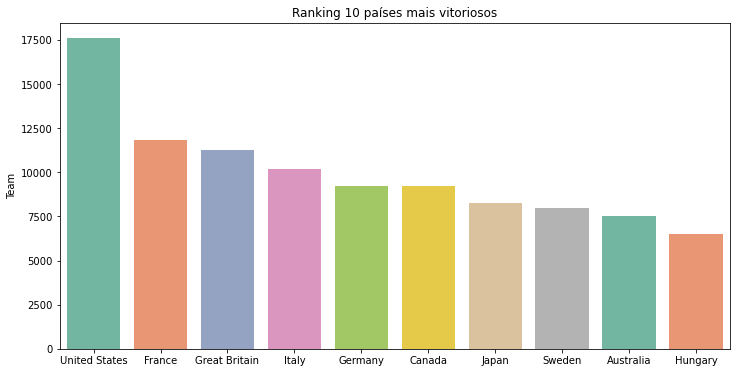

In [65]:
# Gráfico 10 países mais vitoriosos de 1896 a 2016
ranking_paises = df_dados_olimpicos.Team.value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.title('Ranking 10 países mais vitoriosos')
sns.barplot(x=ranking_paises.index, y= ranking_paises, palette='Set2');

#### 1.3 Analisando o desempenho brasileiro

In [21]:
# FILTRANDO APENAS OS ATLETAS BRASILEIROS
brasil=['Brazil']
df_atletas_br = df_dados_olimpicos[df_dados_olimpicos.Team.isin(brasil)]
df_brasil_olimpico = df_atletas_br.reset_index()
del df_brasil_olimpico['index']
df_brasil_olimpico.head(1)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,0,0,0


<AxesSubplot:>

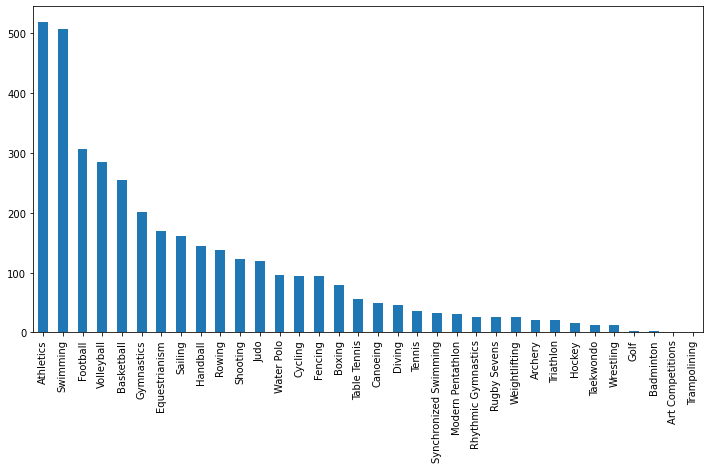

In [22]:
# GRÁFICO DA DISTRIBUIÇÃO DO NÚMERO DE ATLETAS BRASILEIROS POR ESPORTE NOS SUMMER GAMES
plt.figure(figsize=(12,6))
df_brasil_olimpico.query("Season == 'Summer'")['Sport'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='count', ylabel='Sport'>

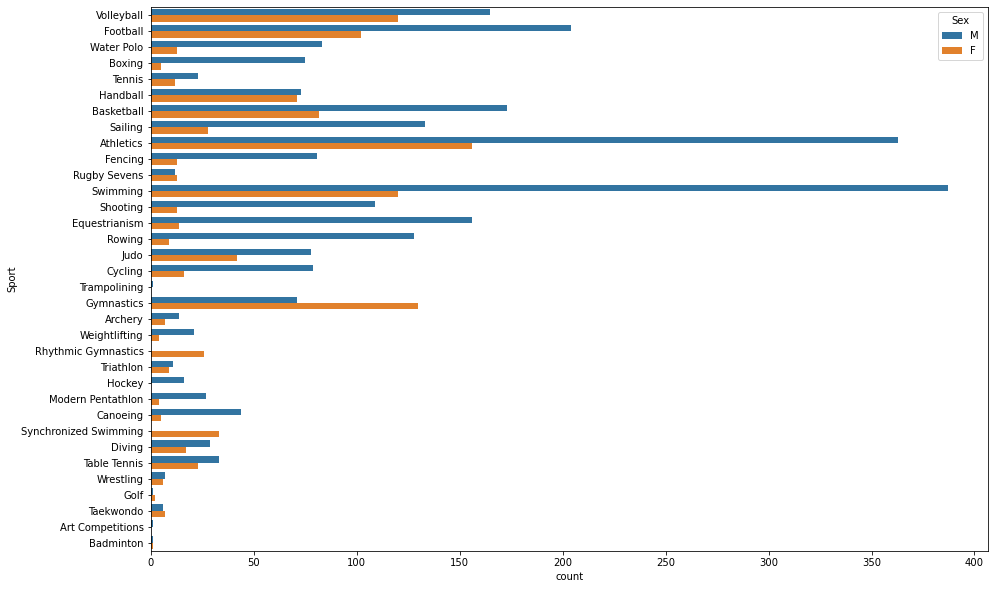

In [23]:
# RELAÇÃO DA PRESENÇA BRASILEIRA: ESPORTE X GÊNERO
plt.figure(figsize=(15,10))
sns.countplot(data=df_brasil_olimpico, y = df_brasil_olimpico.query("Season == 'Summer'")['Sport'], hue='Sex')

In [24]:
# TOTALIZAÇÃO NUMÉRICA DO GRÁFICO ACIMA
contagem_por_sexo = df_brasil_olimpico['Sex'].value_counts()
print(f'Total de atletas masculinos e femininos foi:\n{contagem_por_sexo}')

Total de atletas masculinos e femininos foi:
M    2648
F    1124
Name: Sex, dtype: int64


#### 1.4 Medalhistas

#### Vamos focar um pouco nos casos de sucesso do Brasil. Use o seu DataFrame anterior para filtrar apenas informações sobre **medalhistas** brasileiros. 

#### **DICA:** observe como a coluna ```Medal``` é representada quando o atleta não ganhou medalha.

In [25]:
# Contagem de medalhas
df_brasil_olimpico['Medal'].value_counts()

Bronze    185
Silver    161
Gold      103
Name: Medal, dtype: int64

In [26]:
# TOP 3 GLOBAL
df_medalhas.groupby(by='region')['Gold']
df_medalhas.head(3)

,region,Gold,Silver,Bronze
0,USA,1131.0,901.0,792.0
1,Russia,727.0,600.0,589.0
2,Germany,580.0,592.0,597.0


In [66]:
# NOS TRATAMENTOS ABAIXO OS VALORES 'NaN' FORAM SUBSTITUÍDOS PELA MEDIANA DOS VALORES
# TRATANDO A COLUNA 'Weight'
mediana_peso = df_brasil_olimpico['Weight'].median()
df_brasil_olimpico['Weight'] = df_brasil_olimpico['Weight'].fillna(mediana_peso)

# TRATANDO A COLUNA 'Height'
mediana_altura = df_brasil_olimpico['Height'].median()
df_brasil_olimpico['Height'] = df_brasil_olimpico['Height'].fillna(mediana_altura)

# TRATANDO A COLUNA 'Age'
mediana_idade = df_brasil_olimpico['Age'].median()
df_brasil_olimpico['Age'] = df_brasil_olimpico['Age'].fillna(mediana_idade)

#### 1.5 Verão vs Inverno

#### Você deve ter notado que temos duas categorias distintas de jogos olímpicos, representados pela estação: temos os jogos de verão e os jogos de inverno, que ocorrem de maneira intercalada.

#### Agora que já conhecemos os medalhistas brasileiros, resposta: quantos atletas brasileiros receberam medalha nos jogos de verão e quantos receberam nos jogos de inverno?

In [28]:
# CRIANDO DATAFRAMES SEPARADOS PARA VERÃO E INVERNO
summer = ['Summer']
df_brasil_summer = df_brasil_olimpico[df_brasil_olimpico.Season.isin(summer)]

winter = ['Winter']
df_brasil_winter = df_brasil_olimpico[df_brasil_olimpico.Season.isin(winter)]

# CONTAGEM DAS MEDALHAS
medalhas_summer = df_brasil_summer['Medal'].value_counts().to_dict()
medalhas_winter = df_brasil_winter['Medal'].value_counts().to_dict()
print(f'Desempenho brasileiro em número de medalhas: Verão {medalhas_summer} | Inverno {medalhas_winter}')

Desempenho brasileiro em número de medalhas: Verão {'Bronze': 185, 'Silver': 161, 'Gold': 103} | Inverno {}


#### 1.5.1 Os jogos de verão são bem mais populares do que os jogos de inverno no Brasil. Portanto, deste ponto em diante iremos focar apenas nos jogos de verão. Descarte de seu DataFrame os dados dos jogos de inverno.



In [29]:
del df_brasil_winter

#### 1.6 Atletas do Brasil

#### Vamos conhecer um pouco melhor nossos atletas. Descubra a altura e peso médio de nossos medalhistas.

In [30]:
# Filtrando medalhistas
medalhas = ['Bronze', 'Prata', 'Ouro']
df_summer_medals = df_brasil_summer.loc[df_brasil_summer['Medal'].isin(medalhas)]

# Calculando as médias
media_altura = df_summer_medals['Height'].mean()
media_peso = df_summer_medals['Weight'].mean()

# Print com formatação para até duas casas após a vírgula
print(f'A média da altura dos atletas medalhistas é {media_altura:.2f}cm e o peso médio é {media_peso:.2f}Kg')

A média da altura dos atletas medalhistas é 182.04cm e o peso médio é 76.92Kg


#### 1.7 Imaginamos que diferentes esportes podem beneficiar diferentes tipos físicos, certo? Então refaça a análise anterior, mas obtendo os valores médios **por esporte**.

 A média de altura em "cm" por Sport
Athletics            181.500000
Basketball           185.108696
Boxing               169.333333
Canoeing             175.000000
Equestrianism        180.000000
Football             179.264706
Gymnastics           169.000000
Judo                 178.800000
Modern Pentathlon    166.000000
Sailing              181.875000
Shooting             177.400000
Swimming             188.333333
Taekwondo            184.000000
Volleyball           183.166667
Name: Height, dtype: float64
________________________________________
 A média do peso em "Kg" por Sport
Athletics            74.785714
Basketball           78.565217
Boxing               62.666667
Canoeing             85.000000
Equestrianism        76.000000
Football             74.294118
Gymnastics           65.000000
Judo                 89.133333
Modern Pentathlon    55.000000
Sailing              80.062500
Shooting             72.000000
Swimming             79.800000
Taekwondo            79.500000
Volleyb

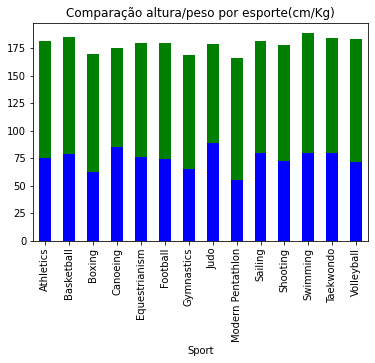

In [31]:
media_altura_esportes = df_summer_medals.groupby(by='Sport')['Height'].mean()
print(f' A média de altura em "cm" por {media_altura_esportes}')
print('_' * 40)
#PLOTAGEM GRÁFICA ALTURA (será plotada junto com o peso em gráfico conjunto | Cor: verde)
ax = media_altura_esportes.plot(x="Sport", y="Height", kind="bar")
media_altura_esportes.plot(x="Sport", y="Height", kind="bar", ax=ax, color="Green");

media_peso_esportes = df_summer_medals.groupby(by='Sport')['Weight'].mean()
print(f' A média do peso em "Kg" por {media_peso_esportes}')
print('_' * 40)
#PLOTAGEM GRÁFICA PESO (será plotad junto com a altura em gráfico conjunto | Cor: azul)
ax = media_peso_esportes.plot(x="Sport", y="Weight", kind="bar", title='Comparação altura/peso por esporte(cm/Kg)')
media_peso_esportes.plot(x="Sport", y="Weight", kind="bar", ax=ax, color="Blue");

#### 1.8 Será que os dados acima influenciaram no interesse geral dos atletas pelo esporte ou realmente impactaram no desempenho deles? Podemos tentar descobrir se há algum tipo de correlação.

#### - atletas de ginástica são predominantemente mais baixos e mais leves

#### - os atletas de judô possuem proporcionalmente à altura, mais peso do que os outros atletas

#### - atletas de natação e basquete são mais altos e magros do que a maioria

#### 1.9 Você ainda possui o dataframe original contendo todos os atletas brasileiros, incluindo os sem medalha? Obtenha os valores médios de peso e altura por esporte daquele dataframe e compare-o com os dos medalhistas. Há alguma diferença significativa em algum esporte?

- No atletismo os medalhistas são mais altos e mais fortes do que os não medalhistas

- No basquete o critério foi que atletas mais leves e com altura semelhante performam melhor (maior massa magra)

- No boxe não há obervação

- Na canoagem, atletas mais fortes e de mesma altura vencem mais.

- Nas provas de cavalo não há relação clara

- No football os atletas que conquistaram medalhas são mais altos e mais fortes que a média total.

- Na ginástica, houve um ligeiro aumento no tamanho e no peso dos atletas, o que demonstra que eles estão fisicamente mais fortes.

- No judô as medalhas vem geralmente de categorias mais pesadas

- No pentathlon os atletas mais vencedores são os menores e mais leves, que geralmente são os mais resistentes fisicamente.

- Na vela não há clara influência do peso e altura no desempenho

- No tiro não há clara influência do peso e altura no desempenho (baixíssimo volume de dados)

- Na natação os atletas maiores e mais fortes vencem mais (maior massa magra)

- No taekwondo as medalhas vem das categorias mais pesadas

- No volei os atletas mais leves venceram mais medalhas (a altura é semelhante, mas novamente a massa magra faz diferença)

In [32]:
# DATAFRAME COM TODOS ATLETAS
df_brasil_olimpico.head(1)

# PARÂMETROS 'groupby': 'by=Sport'(coluna padrão de agrupamento) e '['Height'].mean()'(média da altura)
media_altura_total = df_brasil_olimpico.groupby(by='Sport')['Height'].mean()

# PARÂMETROS 'groupby': 'by=Sport'(coluna padrão de agrupamento) e '['Weight'].mean()'(média do peso)
media_peso_total = df_brasil_olimpico.groupby(by='Sport')['Weight'].mean()

"""RELAÇÃO PESO E ALTURA --> MEDALHISTAS X NÃO MEDALHISTAS
VALORES IGUAIS OU MAIORES DO QUE 1 INDICAM QUE ALTURA E PESO NÃO INFLUENCIAM EM GERAL. EM CONTRAPARTIDA,
QUANTO MENORES DO QUE 1 FOREM OS VALORES, MAIOR O IMPACTO DE ALTURA E PESO NOS RESULTADOS.
"""

# CONSTRUINDO DF COM ALTURA/PESO MÉDIOS EM RELAÇÃO AO TOTAL DE ATLETAS BRASILEIROS MEDALHISTAS
medalhistas = pd.merge(media_altura_esportes, media_peso_esportes, how= 'right', on = 'Sport')

# CONSTRUINDO DF COM ALTURA/PESO MÉDIOS EM RELAÇÃO AO TOTAL DE ATLETAS BRASILEIROS
total = pd.merge(media_altura_total, media_peso_total, how= 'right', on = 'Sport')

# UNINDO DF COM TODOS ATLETAS E COM MEDALHISTAS
# PARÂMETROS UTILIZADOS: "how=outer" (inclui os dois df) e "on=Sport"(usa a coluna Sport como index)
concatenado = pd.merge(total, medalhistas, how='right', on='Sport')

# REMOVENDO 'NaN'
final = concatenado.dropna()

# RENOMEANDO COLUNAS PARA NOMES AMIGÁVEIS
final.rename(columns={'Height_x': 'Média Altura Total', 'Weight_x': 'Média Peso Total','Height_y': 'Média Altura Medalhistas','Weight_y': 'Média Peso Medalhistas'}, inplace=True)

# CRIANDO COLUNAS DE RELAÇÃO
final['Altura T / M'] = final['Média Altura Total'] / final['Média Altura Medalhistas']
final['Peso T / M'] = final['Média Peso Total'] / final['Média Peso Medalhistas']

# REORDENANDO COLUNAS
final = final[['Média Altura Total','Média Altura Medalhistas','Altura T / M','Média Peso Total','Média Peso Medalhistas','Peso T / M']]
final

,Média Altura Total,Média Altura Medalhistas,Altura T / M,Média Peso Total,Média Peso Medalhistas,Peso T / M
Sport,,,,,,
Athletics,176.400771,181.500000,0.971905,68.402697,74.785714,0.914649
Basketball,189.494118,185.108696,1.023691,83.501961,78.565217,1.062836
Boxing,172.962500,169.333333,1.021432,65.487500,62.666667,1.045013
Canoeing,177.795918,175.000000,1.015977,77.285714,85.000000,0.909244
Equestrianism,177.500000,180.000000,0.986111,72.252941,76.000000,0.950697
Football,173.777778,179.264706,0.969392,68.356209,74.294118,0.920076
Gymnastics,157.990050,169.000000,0.934852,53.144279,65.000000,0.817604
Judo,174.366667,178.800000,0.975205,79.391667,89.133333,0.890707
Modern Pentathlon,173.451613,166.000000,1.044889,69.806452,55.000000,1.269208


### 2. Existe um detalhe importante passando batido até agora em nossa análise: as categorias esportivas costumam ser divididas por gênero justamente por conta de diferenças físicas entre homens e mulheres que poderiam influenciar no desempenho. Compare a altura e peso médios de atletas brasileiros por esporte segmentado por sexo.

In [33]:
media_altura = df_brasil_summer.groupby(by=['Sport','Sex'])['Height'].mean()
media_altura.reset_index()

,Sport,Sex,Height
0,Archery,F,162.857143
1,Archery,M,177.857143
2,Art Competitions,M,178.000000
3,Athletics,F,168.435897
4,Athletics,M,179.823691
...,...,...,...
58,Water Polo,M,180.433735
59,Weightlifting,F,161.500000
60,Weightlifting,M,172.666667
61,Wrestling,F,169.333333


In [34]:
media_peso = df_brasil_summer.groupby(by=['Sport','Sex'])['Weight'].mean()
media_peso.reset_index()

,Sport,Sex,Weight
0,Archery,F,59.714286
1,Archery,M,77.714286
2,Art Competitions,M,72.000000
3,Athletics,F,60.903846
4,Athletics,M,71.625344
...,...,...,...
58,Water Polo,M,78.614458
59,Weightlifting,F,62.750000
60,Weightlifting,M,90.000000
61,Wrestling,F,66.666667


#### 2.1 Qual foi (ou quais foram) o maior medalhista brasileiro em quantidade total de medalhas?

In [35]:
# MONTANDO UMA FUNÇÃO PARA LISTAR OS MELHORES DE QUALQUER PAÍS A SER ANALISADO
# CRÉDITO DA FÓRMULA DADO AO LIVRO 'DATA SCIENCE DO ZERO'

def maiores_medalhistas(df,country):
    """
    Em um dataframe temporário, tratar dados NaN na coluna medalhas.
    No mesmo dataframe definir o país a ser filtrado nos dados.
    Na variável 'x' listar os 15 maiores medalhistas alinhando as colunas com um merge e 
    removendo eventuais dados duplicados.
    Renomear as colunas subsituindo os dados com 'inplace'. Retornar x.
    """
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region'] == country]
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

top_atletas_br = maiores_medalhistas(df_brasil_olimpico,'Brazil')
top_atletas_br

,Name,Medals,Sport
0,Torben Schmidt Grael,5,Sailing
6,Robert Scheidt,5,Sailing
12,Gustavo Frana Borges,4,Swimming
25,"Srgio ""Escadinha"" Dutra dos Santos",4,Volleyball
29,Csar Augusto Cielo Filho,3,Swimming
34,"Gilberto Amauri ""Giba"" de Godoy Filho",3,Volleyball
38,Dante Guimares Santos do Amaral,3,Volleyball
42,"Rodrigo ""Rodrigo"" Santana",3,Volleyball
45,Isaquias Queiroz dos Santos,3,Canoeing
48,"Bruno ""Bruninho"" Mossa de Rezende",3,Volleyball


#### 2.2 E o(s) maior(es) em quantidade de medalhas de ouro?

In [36]:
medalhistas_ouro = df_brasil_olimpico[df_brasil_olimpico['Medal']=='Gold']['Name'].value_counts()
medalhistas_ouro.head(8)

Marcelo Bastos Ferreira                               2
Adhemar Ferreira da Silva                             2
Paula Renata Marques Pequeno                          2
Jaqueline Maria "Jaque" Pereira de Carvalho Endres    2
Torben Schmidt Grael                                  2
Giovane Farinazzo Gvio                                2
Robert Scheidt                                        2
Sheilla Tavares de Castro Blassioli                   2
Name: Name, dtype: int64

#### 2.3 Qual esporte rendeu mais medalhas de ouro para o Brasil? E qual rendeu mais medalhas no total?

##### **DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

#### 2.3.1 Mais medalhas de ouro

In [37]:
# ESPORTES QUE MAIS RENDERAM MEDALHAS AO BRASIL
medalhas_brasil_ouro_esporte = df_dados_tratados[df_dados_tratados['NOC'] == 'BRA'].groupby('Sport').sum()['Gold'].reset_index()
medalhas_brasil_ouro_esporte.sort_values(by=['Gold'], ascending=False).head(3)

,Sport,Gold
29,Sailing,7
3,Athletics,5
39,Volleyball,5


#### 2.3.2 Mais medalhas no total

In [38]:
# O DATAFRAME 'df_dados_tratados' JÁ RESOLVEU ESSE PROBLEMA DOS ESPORTES COLETIVOS
medalhas_brasil_total_esporte = df_dados_tratados[df_dados_tratados['region'] == 'Brazil'].groupby('Sport').count()['Medal'].reset_index()
medalhas_brasil_total_esporte.sort_values(by=['Medal','Sport'], ascending=False).head(3)

,Sport,Medal
23,Judo,22
29,Sailing,18
3,Athletics,16


#### 2.4 Cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

#### Sabendo disso, qual evento esportivo mais rendeu medalhas de ouro para o Brasil? E total de medalhas?

#### 2.4.1 Evento que mais rendeu medalhas de ouro

In [39]:
medalhas_brasil_ouro_evento = df_dados_tratados[df_dados_tratados['region'] == 'Brazil'].groupby('Event').sum()['Gold'].reset_index()
medalhas_brasil_ouro_evento.sort_values(by=['Gold','Event'], ascending=False).head(3)

,Event,Gold
308,Volleyball Men's Volleyball,3
309,Volleyball Women's Volleyball,2
215,Sailing Mixed One Person Dinghy,2


#### 2.4.2 Evento que mais rendeu medalhas no total

In [40]:
medalhas_brasil_total_esporte = df_dados_tratados[df_dados_tratados['region'] == 'Brazil'].groupby('Event').count()['Medal'].reset_index()
medalhas_brasil_total_esporte.sort_values(by=['Medal','Event'], ascending=False).head(3)

,Event,Medal
67,Beach Volleyball Women's Beach Volleyball,7
308,Volleyball Men's Volleyball,6
152,Football Men's Football,6


#### 2.4.3 Para finalizar sobre o Brasil: obtenha o total de medalhas de ouro, prata, bronze e total por ano.

In [42]:
medalhas_brasil_totais = df_dados_tratados[df_dados_tratados['region'] == 'Brazil'].groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
medalhas_brasil_totais['Total'] = medalhas_brasil_totais['Gold'] + medalhas_brasil_totais['Silver'] + medalhas_brasil_totais['Bronze']
medalhas_brasil_totais

,Year,Gold,Silver,Bronze,Total
0,1900,0,0,0,0
1,1920,1,1,1,3
2,1924,0,0,0,0
3,1932,0,0,0,0
4,1936,0,0,0,0
5,1948,0,0,1,1
6,1952,1,0,2,3
7,1956,1,0,0,1
8,1960,0,0,2,2
9,1964,0,0,1,1


### 3. O mundo nos jogos de verão

#### Vamos agora analisar um pouquinho do que aconteceu nas Olimpíadas de verão em todo o mundo.

#### 3.1 Retome o DataFrame original e descarte as informações sobre os jogos de inverno.

In [43]:
summer = ['Summer']
df_olimpiada_verao = df_dados_olimpicos[df_dados_olimpicos.Season.isin(summer)]
df_olimpiada_verao.head(1)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0


#### 3.2 Obtenha a lista de todos os esportes já disputados nas olimpíadas de verão.

In [44]:
lista_esportes = df_olimpiada_verao['Sport'].unique().tolist()
print('Esportes já disputados nas Olimpíadas de Verão:', *lista_esportes, sep='\n- ')

Esportes já disputados nas Olimpíadas de Verão:
- Basketball
- Judo
- Football
- Tug-Of-War
- Athletics
- Swimming
- Badminton
- Sailing
- Gymnastics
- Art Competitions
- Handball
- Weightlifting
- Wrestling
- Water Polo
- Hockey
- Rowing
- Fencing
- Equestrianism
- Shooting
- Boxing
- Taekwondo
- Cycling
- Diving
- Canoeing
- Tennis
- Modern Pentathlon
- Golf
- Softball
- Archery
- Volleyball
- Synchronized Swimming
- Table Tennis
- Baseball
- Rhythmic Gymnastics
- Rugby Sevens
- Trampolining
- Beach Volleyball
- Triathlon
- Rugby
- Lacrosse
- Polo
- Cricket
- Ice Hockey
- Racquets
- Motorboating
- Croquet
- Figure Skating
- Jeu De Paume
- Roque
- Basque Pelota
- Alpinism
- Aeronautics


#### 3.3 Obtenha a lista de todas as modalidades esportivas já disputadas nas olimpíadas de verão.

In [71]:
lista_modalidades = df_olimpiada_verao['Event'].unique().tolist()
# print('Modalidades já disputadas nas Olimpíadas de Verão:', *lista_modalidades, sep='\n- ')
lista_modalidades

["Basketball Men's Basketball",
 "Judo Men's Extra-Lightweight",
 "Football Men's Football",
 "Tug-Of-War Men's Tug-Of-War",
 "Athletics Women's 100 metres",
 "Athletics Women's 4 x 100 metres Relay",
 "Swimming Men's 400 metres Freestyle",
 "Badminton Men's Singles",
 "Sailing Women's Windsurfer",
 "Swimming Men's 200 metres Breaststroke",
 "Swimming Men's 400 metres Breaststroke",
 "Gymnastics Men's Individual All-Around",
 "Gymnastics Men's Team All-Around",
 "Gymnastics Men's Floor Exercise",
 "Gymnastics Men's Horse Vault",
 "Gymnastics Men's Parallel Bars",
 "Gymnastics Men's Horizontal Bar",
 "Gymnastics Men's Rings",
 "Gymnastics Men's Pommelled Horse",
 "Athletics Men's Shot Put",
 'Art Competitions Mixed Sculpturing, Unknown Event',
 "Handball Women's Handball",
 "Weightlifting Women's Super-Heavyweight",
 "Wrestling Men's Light-Heavyweight, Greco-Roman",
 "Gymnastics Men's Team All-Around, Free System",
 "Water Polo Men's Water Polo",
 'Sailing Mixed Three Person Keelboat',


#### 3.4 Obtenha a lista de todos os países que já disputaram olimpíadas.

In [46]:
# 'unique' --> valores únicos são devolvidos por ordem que aparecem | não aceita classificação
lista_paises = df_dados_olimpicos['region'].unique().tolist()
print(lista_paises)
print("_" * 116)
# 'nunique' --> mostra quantos valores únicos existem para cada coluna | aceita classificação
print('Total de países que já disputaram olimpíadas:',df_dados_olimpicos['region'].nunique())

['China', 'Denmark', 'Netherlands', 'USA', 'Finland', 'Norway', 'Romania', 'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey', 'Chile', 'Mexico', 'Nicaragua', 'Hungary', 'Nigeria', 'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria', 'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland', 'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan', 'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros', 'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives', 'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia', 'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco', 'Israel', 'Uruguay', 'Sweden', 'Virgin Islands, US', 'Sri Lanka', 'Armenia', 'Ivory Coast', 'Kenya', 'Benin', 'Ukraine', 'UK', 'Ghana', 'Somalia', 'Latvia', 'Niger', 'Mali', 'Afghanistan'

#### 3.5 Qual atleta foi o maior medalhista (em medalhas totais) da história das olimpíadas de verão?

In [47]:
maior_medalhista_total = df_olimpiada_verao[df_olimpiada_verao['Medal'].notna()]
maior_medalhista_total['Name'].value_counts().head(1)

Michael Fred Phelps, II    28
Name: Name, dtype: int64

#### 3.6 Qual atleta foi o maior medalhista de ouro da história das olimpíadas de verão?

In [48]:
maior_medalhista_ouro = df_olimpiada_verao[df_olimpiada_verao['Medal']=='Gold']['Name'].value_counts()
maior_medalhista_ouro.head(1)

Michael Fred Phelps, II    23
Name: Name, dtype: int64

#### 3.7 Qual país foi o maior medalhista de ouro da história das olimpíadas de verão? Lembre-se da questão do evento esportivo, para não considerar múltiplas medalhas para um mesmo evento (ex: uma equipe de futebol fazendo parecer que mais de 20 medalhas foram distribuídas).

In [49]:
mais_ouro_historia = df_dados_tratados[df_dados_olimpicos['Medal']=='Gold']['NOC'].value_counts()
mais_ouro_historia.head(1)

<ipython-input-49-7258c888c9bd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mais_ouro_historia = df_dados_tratados[df_dados_olimpicos['Medal']=='Gold']['NOC'].value_counts()


USA    1131
Name: NOC, dtype: int64

#### 3.8 Qual país foi o maior medalhista em medalhas totais na história das olimpíadas de verão?

In [50]:
ranking_paises = df_dados_tratados.Team.value_counts().sort_values(ascending=False).head(1)
ranking_paises.head(1)

United States    6877
Name: Team, dtype: int64

#### 3.9 Obtenha o total de medalhas de ouro, prata e total por edição das Olimpíadas de verão. Lembre-se da questão do evento esportivo.

In [51]:
df_total_por_ano = df_dados_tratados.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
df_total_por_ano

,Year,Gold,Silver,Bronze
0,1896,44.0,41.0,35.0
1,1900,102.0,99.0,99.0
2,1904,97.0,93.0,90.0
3,1906,74.0,77.0,73.0
4,1908,109.0,107.0,106.0
5,1912,108.0,104.0,104.0
6,1920,158.0,152.0,139.0
7,1924,149.0,147.0,148.0
8,1928,133.0,130.0,134.0
9,1932,139.0,139.0,134.0


### 4. Brasil vs Mundo

#### 4.1 Para finalizar, vamos fazer algumas comparações entre Brasil e mundo. Qual o ranking do Brasil em cada edição das olimpíadas? Lembrando que o ranking é ordenado por medalhas de ouro.

In [52]:
summer = ['Summer']
df_dados_tratados = df_dados_tratados[df_dados_tratados.Season.isin(summer)]

In [53]:
ranking_brasil =df_dados_tratados.groupby(by=['Year','NOC'])['Medal'].value_counts().to_frame(name='Quantidade de medalhas')

ranking_brasil.rename(columns = {'NOC': 'Gold Medals'}, inplace=True)

ranking_brasil_2 = ranking_brasil.copy()

df_cumcount = ranking_brasil_2.groupby('Year').cumcount()

ranking_brasil_2['Ranking'] = df_cumcount + 1

ranking_brasil_2.reset_index(inplace=True)

df_final = ranking_brasil_2[ranking_brasil_2['NOC'] == 'BRA']

df_temp = df_final['Medal']=='Gold'

df_final = df_final[df_temp]

df_final.set_index('Year',inplace=True)

df_final

,NOC,Medal,Quantidade de medalhas,Ranking
Year,,,,
1920,BRA,Gold,1,7
1952,BRA,Gold,1,12
1956,BRA,Gold,1,9
1980,BRA,Gold,2,9
1984,BRA,Gold,1,13
1988,BRA,Gold,1,11
1992,BRA,Gold,2,11
1996,BRA,Gold,3,22
2004,BRA,Gold,5,18


#### 4.2 Compare o maior medalhista em ouros do Brasil com o maior medalhista em ouros do mundo.

In [54]:
print('Maior medalhista de ouro em comparação direta EUA x BRA:')
print('\n------------Mundo------------')
print(maior_medalhista_ouro.head(1))
print('\n-------- ---Brasil-----------')
print(medalhistas_ouro.head(1))

Maior medalhista de ouro em comparação direta EUA x BRA:

------------Mundo------------
Michael Fred Phelps, II    23
Name: Name, dtype: int64

-------- ---Brasil-----------
Marcelo Bastos Ferreira    2
Name: Name, dtype: int64


#### 4.3 Compare o maior medalhista em total de medalhas do Brasil com o maior medalhista em total de medalhas do mundo.

In [55]:
print('Maior medalhista geral em comparação direta EUA x BRA:')
print('----------Estados Unidos da América----------')
print(maior_medalhista_total['Name'].value_counts().head(1))
print('--------------------Brasil-------------------')
print(top_atletas_br.head(1))

Maior medalhista geral em comparação direta EUA x BRA:
----------Estados Unidos da América----------
Michael Fred Phelps, II    28
Name: Name, dtype: int64
--------------------Brasil-------------------
                   Name  Medals    Sport
0  Torben Schmidt Grael       5  Sailing


#### 4.4 Compare o maior medalhista em ouros do Brasil com o maior medalhista do mundo no mesmo esporte.

In [56]:
print('--------------------Brasil-------------------')
gold_br = df_brasil_olimpico[df_brasil_olimpico['Sport']=='Sailing']
print(gold_br.groupby('Name').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(1))
print('--------------------Mundo--------------------')
best_sailor = df_dados_tratados[df_dados_tratados['Sport']=='Sailing']
print(best_sailor.groupby('Name').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(1))

--------------------Brasil-------------------
                   Name  Gold  Silver  Bronze
0  Torben Schmidt Grael     2       1       2
--------------------Mundo--------------------
                             Name  Gold  Silver  Bronze
0  Charles Benedict "Ben" Ainslie     4       1       0


#### 4.5 Compare o maior medalhista em total de medalhas do Brasil com o maior medalhista do mundo no mesmo esporte.

In [57]:
print('--------------------Brasil-------------------')
print(top_atletas_br.head(1))
print('--------------------Mundo--------------------')
print(best_sailor.groupby('Name').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(1))

--------------------Brasil-------------------
                   Name  Medals    Sport
0  Torben Schmidt Grael       5  Sailing
--------------------Mundo--------------------
                             Name  Gold  Silver  Bronze
0  Charles Benedict "Ben" Ainslie     4       1       0


#### 4.6 Calcule o percentual de medalhas de ouro, prata e bronze que o Brasil ganhou em cada olimpíada.

#### Em relação ao total brasileiro de medalhas

In [58]:
# PERCENTUAIS MEDALHAS BRASIL EM RELAÇÃO AO PRÓPRIO BRASIL
total = medalhas_brasil_totais['Gold'] + medalhas_brasil_totais['Silver'] + medalhas_brasil_totais['Bronze']
medalhas_brasil_totais['% Gold'] = medalhas_brasil_totais['Gold'] / total * 100
medalhas_brasil_totais['% Silver'] = medalhas_brasil_totais['Silver'] / total * 100
medalhas_brasil_totais['% Bronze'] = medalhas_brasil_totais['Bronze'] / total * 100
# medalhas_brasil_totais.fillna(0, inplace=True)
medalhas_brasil_totais.dropna(axis=0,inplace=True)
medalhas_brasil_totais.sample(10)

,Year,Gold,Silver,Bronze,Total,% Gold,% Silver,% Bronze
9,1964,0,0,1,1,0.000000,0.000000,100.000000
5,1948,0,0,1,1,0.000000,0.000000,100.000000
14,1984,1,5,2,8,12.500000,62.500000,25.000000
18,1996,3,3,9,15,20.000000,20.000000,60.000000
22,2004,5,2,3,10,50.000000,20.000000,30.000000
8,1960,0,0,2,2,0.000000,0.000000,100.000000
7,1956,1,0,0,1,100.000000,0.000000,0.000000
13,1980,2,0,2,4,50.000000,0.000000,50.000000
6,1952,1,0,2,3,33.333333,0.000000,66.666667
28,2016,7,6,6,19,36.842105,31.578947,31.578947


#### Em relação ao total de medalhas distribuídos por edição

In [59]:
# PERCENTUAIS MEDALHAS BRASIL EM RELAÇÃO AO TOTAL DE MEDALHAS EM DISPUTA
percentual_em_relacao_total = df_brasil_olimpico.groupby(['Year', 'Medal']).size() / df_brasil_olimpico.groupby('Year').size()
percentual_em_relacao_total.head(3)

Year  Medal 
1920  Bronze    0.131579
      Gold      0.026316
      Silver    0.026316
dtype: float64

#### EXTRAS

In [72]:
# LISTAR PRESENÇA MASCULINA POR ANO
homens = df_dados_tratados[df_dados_tratados['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
# LISTAR PRESENÇA FEMININA POR ANO
mulheres = df_dados_tratados[df_dados_tratados['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
# MERGE NAS DUAS LISTAS SUBSTITUINDO NULOS POR '0'
lista_final = homens.merge(mulheres,on='Year',how='left')
lista_final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)
lista_final = lista_final.fillna(0)
lista_final.sample(10)

,Year,Male,Female
14,1960,3007,560.0
16,1968,3131,798.0
0,1896,231,0.0
3,1906,679,8.0
27,2012,4132,3232.0
12,1952,2698,461.0
24,2000,4611,2787.0
7,1924,1796,127.0
20,1984,3662,1104.0
2,1904,413,9.0


In [61]:
cidades = df_dados_tratados.groupby('City').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
cidades.columns = ['City', 'Years']
cidades['No. Eventos'] = [len(c) for c in cidades['Years']]
cidades.sort_values('No. Eventos', ascending=False)

,City,Years,No. Eventos
2,Athina,"[2004, 1906, 1896]",3
8,London,"[2012, 1948, 1908]",3
20,Stockholm,"[1912, 1956]",2
9,Los Angeles,"[1932, 1984]",2
15,Paris,"[1900, 1924]",2
0,Amsterdam,[1928],1
13,Moskva,[1980],1
21,Sydney,[2000],1
19,St. Louis,[1904],1
18,Seoul,[1988],1
